#Hand Movement classification Using Deep Neural network

In [4]:
! pip install kagglehub

You should consider upgrading via the 'C:\Users\alira\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


#data reading and create dataframe

In [6]:
import kagglehub

import kagglehub
path = kagglehub.dataset_download("fabriciotorquato/eeg-data-from-hands-movement")
print("Path to dataset files:", path)

100%|██████████| 10.9M/10.9M [00:16<00:00, 679kB/s] 

Extracting files...


Path to dataset files: C:\Users\alira\.cache\kagglehub\datasets\fabriciotorquato\eeg-data-from-hands-movement\versions\5


In [7]:
! pip install pandas numpy matplotlib

You should consider upgrading via the 'C:\Users\alira\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
import os
print("Files in directory:", os.listdir(path))

Files in directory: ['Dataset']


In [13]:

# Original path from kagglehub
path = r"C:\Users\alira\.cache\kagglehub\datasets\fabriciotorquato\eeg-data-from-hands-movement\versions\5"

# Adjusted path to the 'Dataset' subdirectory
dataset_path = os.path.join(path, "Dataset")

# Verify files
print("Files in adjusted directory:", os.listdir(dataset_path))

Files in adjusted directory: ['user_a.csv', 'user_b.csv', 'user_c.csv', 'user_d.csv']


In [14]:
import pandas as pd
import os

# Set the correct path
dataset_path = r"C:\Users\alira\.cache\kagglehub\datasets\fabriciotorquato\eeg-data-from-hands-movement\versions\5\Dataset"

# List CSV files
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
print("Found CSV files:", csv_files)

# Check if files were found
if not csv_files:
    raise FileNotFoundError(f"No CSV files found in {dataset_path}. Please check the directory.")

# Initialize list for dataframes
dataframes = []

# Read each CSV and add a 'user' column
for file in csv_files:
    file_path = os.path.join(dataset_path, file)
    df = pd.read_csv(file_path)
    df['user'] = file.split('.')[0]  # e.g., 'user_a'
    dataframes.append(df)

# Combine into a single dataset
dataset = pd.concat(dataframes, ignore_index=True)

# Save combined dataset (optional)
dataset.to_csv("combined_eeg_dataset.csv", index=False)

print("Dataset loaded successfully!")

Found CSV files: ['user_a.csv', 'user_b.csv', 'user_c.csv', 'user_d.csv']
Dataset loaded successfully!


In [15]:
# Basic info
print("Dataset Info:")
print(dataset.info())

print("\nShape (rows, columns):", dataset.shape)

print("\nFirst 5 rows:")
print(dataset.head())

# Identify feature columns (adjust based on actual columns)
feature_cols = [col for col in dataset.columns if col not in ['user', 'timestamp', 'label']]
print("\nFeature Columns:", feature_cols)

# Statistics
print("\nFeature Statistics:")
print(dataset[feature_cols].describe())

# Missing values
print("\nMissing Values:")
print(dataset.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Columns: 114 entries, Class to user
dtypes: float64(113), object(1)
memory usage: 10.0+ MB
None

Shape (rows, columns): (11520, 114)

First 5 rows:
   Class  AF3 delta std  AF3 delta m  AF3 theta std  AF3 theta m  \
0    1.0    3569.164550  2063.892754       1.673726     4.444736   
1    1.0    3568.423670  2063.099248       1.897790     3.728823   
2    1.0    3568.157929  2062.445859       2.798014     2.574504   
3    1.0    3567.710021  2062.112673       2.181775     3.610507   
4    1.0    3565.546124  2063.128867       1.685161     3.384311   

   AF3 alpha std  AF3 alpha m  AF3 beta std  AF3 beta m  F7 delta std  ...  \
0       0.526209     3.002088      1.425022    3.302739   3563.803888  ...   
1       1.304186     1.854353      1.366575    2.546458   3563.560922  ...   
2       1.120537     1.958819      0.982433    2.258622   3563.279981  ...   
3       0.629608     2.155876      0.8562


Class Distribution:
Class
1.0    3840
2.0    3840
0.0    3840
Name: count, dtype: int64

Feature Summary (first 5 features):
       AF3 delta std   AF3 delta m  AF3 theta std   AF3 theta m  AF3 alpha std
count   11520.000000  11520.000000   11520.000000  11520.000000   11520.000000
mean     3571.588010   2064.802117       1.042080      2.461821       0.909898
std         8.332205      5.111574       0.616193      1.240949       0.462773
min      3370.595863   1978.862421       0.030171      0.479354       0.066521
25%      3569.067460   2063.029951       0.678118      1.902200       0.594002
50%      3571.816872   2064.547292       0.961184      2.312287       0.845206
75%      3574.115918   2065.889854       1.285127      2.775746       1.148914
max      3725.451803   2189.586102      15.206517     30.192580       9.030337

Samples per User:
user
user_a    2880
user_b    2880
user_c    2880
user_d    2880
Name: count, dtype: int64


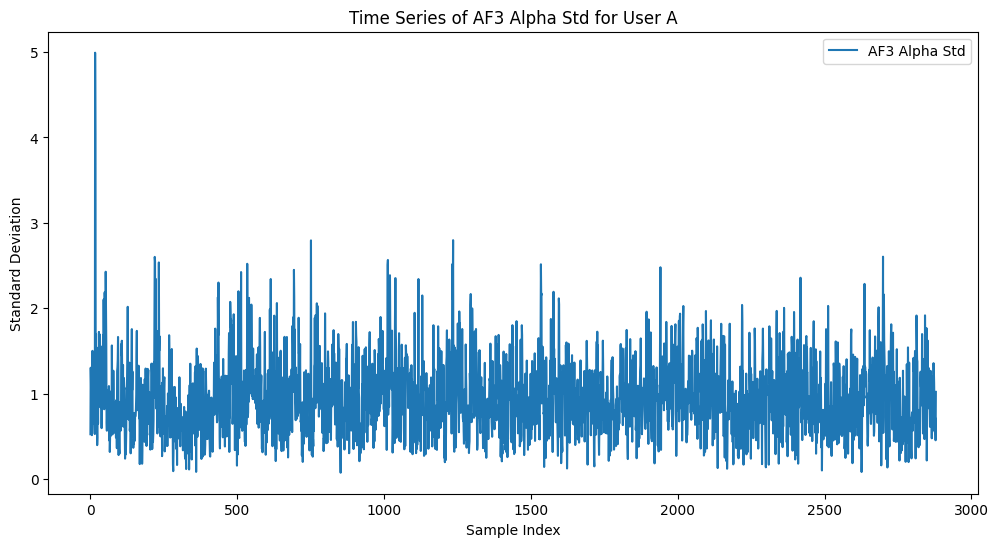

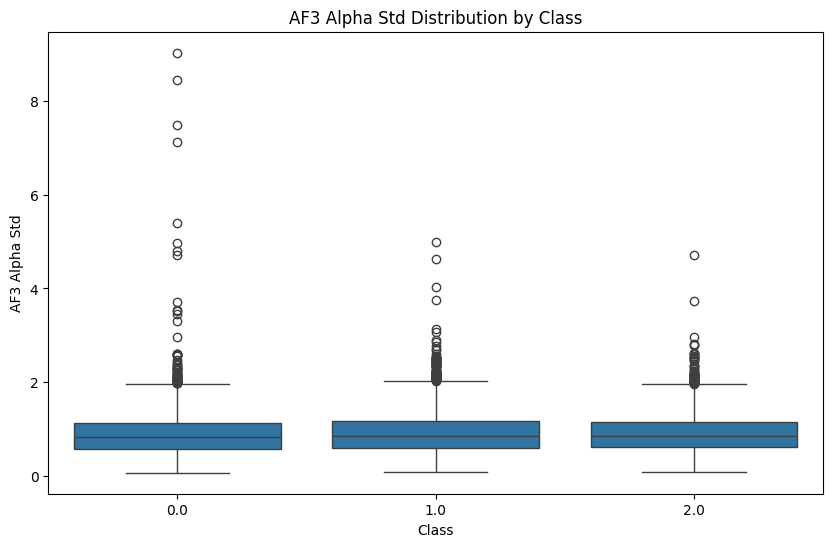

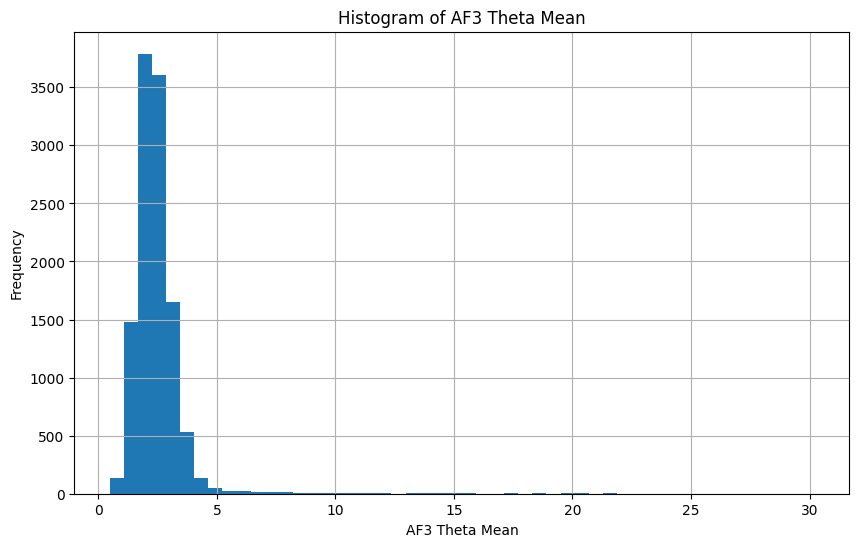

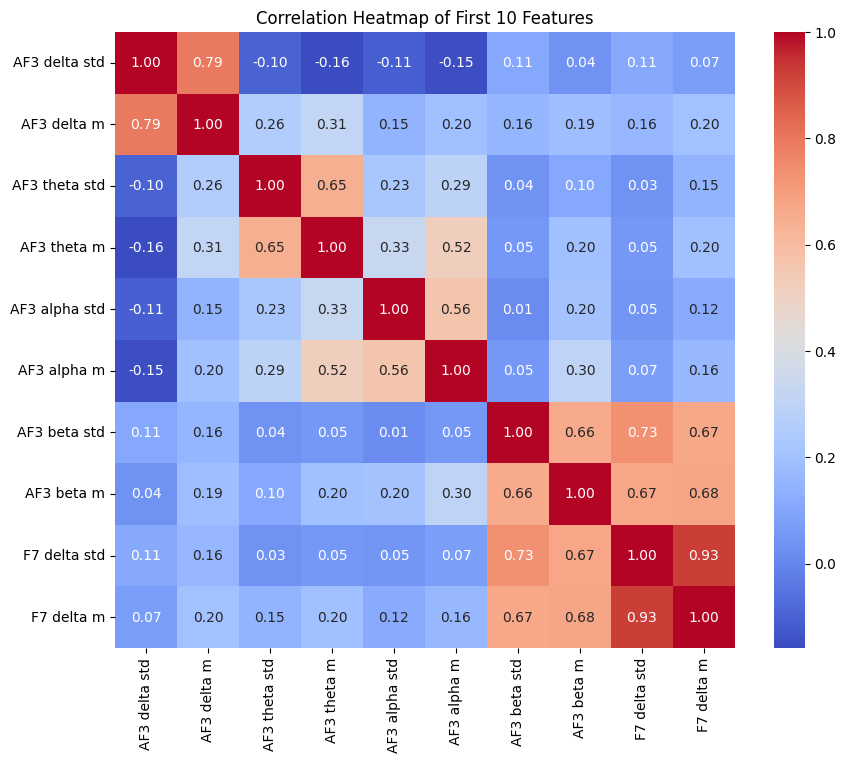

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is already loaded from your previous code

# 1. Class Distribution
print("\nClass Distribution:")
print(dataset['Class'].value_counts())

# 2. Feature Scaling and Summary
feature_cols = [col for col in dataset.columns if col not in ['Class', 'user']]
print("\nFeature Summary (first 5 features):")
print(dataset[feature_cols[:5]].describe())

# 3. User Variability
print("\nSamples per User:")
print(dataset['user'].value_counts())

# 4. Visualizations

# Plot 1: Time Series of a Sample Feature (e.g., AF3 alpha std) for User A
user_a_data = dataset[dataset['user'] == 'user_a']
plt.figure(figsize=(12, 6))
plt.plot(user_a_data['AF3 alpha std'], label='AF3 Alpha Std')
plt.title("Time Series of AF3 Alpha Std for User A")
plt.xlabel("Sample Index")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

# Plot 2: Boxplot of Features Across Classes (e.g., AF3 alpha std)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='AF3 alpha std', data=dataset)
plt.title("AF3 Alpha Std Distribution by Class")
plt.xlabel("Class")
plt.ylabel("AF3 Alpha Std")
plt.show()

# Plot 3: Histogram of a Feature (e.g., AF3 theta m)
plt.figure(figsize=(10, 6))
dataset['AF3 theta m'].hist(bins=50)
plt.title("Histogram of AF3 Theta Mean")
plt.xlabel("AF3 Theta Mean")
plt.ylabel("Frequency")
plt.show()

# Plot 4: Correlation Heatmap of First 10 Features
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[feature_cols[:10]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of First 10 Features")
plt.show()

#preproccessing

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader

# Assuming 'dataset' is already loaded with 11,520 rows and 114 columns

# Feature columns (112 features)
feature_cols = [col for col in dataset.columns if col not in ['Class', 'user']]

# 1. Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(dataset[feature_cols].values)
print("Features normalized!")


Features normalized!


In [19]:
# 2. Handle labels
y = dataset['Class'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert float labels (e.g., 1.0, 2.0) to integers (0, 1, ...)
print("Label classes:", label_encoder.classes_)
num_classes = len(label_encoder.classes_)


Label classes: [0. 1. 2.]


In [20]:

# 3. Split into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)  # 0.1765 of 85% ≈ 15% of total

print("Training set shape:", X_train.shape)  # ~70% (8,064 samples)
print("Validation set shape:", X_val.shape)  # ~15% (1,728 samples)
print("Test set shape:", X_test.shape)      # ~15% (1,728 samples)


Training set shape: (8063, 112)
Validation set shape: (1729, 112)
Test set shape: (1728, 112)


In [21]:


# 4. Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.LongTensor(y_val)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)


In [22]:

# 5. Create PyTorch Dataset and DataLoader
class EEGDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = EEGDataset(X_train, y_train)
val_dataset = EEGDataset(X_val, y_val)
test_dataset = EEGDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Modeling

In [23]:
import torch.nn as nn
import torch.optim as optim

In [46]:
# Training and Evaluation Function
def train_and_evaluate(model, train_loader, val_loader, test_loader, num_epochs=50, patience=5):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)
    
    train_losses, val_losses, test_losses = [], [], []
    train_accs, val_accs, test_accs = [], [], []
    best_val_loss = float('inf')
    best_model_state = None
    early_stop_counter = 0
    
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, train_total = 0, 0, 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_total += y_batch.size(0)
            train_correct += (predicted == y_batch).sum().item()
        
        train_loss /= len(train_loader)
        train_acc = train_correct / train_total
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                val_loss += criterion(outputs, y_batch).item()
                _, predicted = torch.max(outputs, 1)
                val_total += y_batch.size(0)
                val_correct += (predicted == y_batch).sum().item()
        
        val_loss /= len(val_loader)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        test_loss, test_correct, test_total = 0, 0, 0
        all_preds, all_labels, all_probs = [], [], []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                test_loss += criterion(outputs, y_batch).item()
                _, predicted = torch.max(outputs, 1)
                test_total += y_batch.size(0)
                test_correct += (predicted == y_batch).sum().item()
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(y_batch.cpu().numpy())
                all_probs.extend(torch.softmax(outputs, dim=1).cpu().numpy())
        
        test_loss /= len(test_loader)
        test_acc = test_correct / test_total
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = deepcopy(model.state_dict())
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break
        
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f} | "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
    
    model.load_state_dict(best_model_state)
    
    model.eval()
    all_preds, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
            all_probs.extend(torch.softmax(outputs, dim=1).cpu().numpy())
    
    cm = confusion_matrix(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)], output_dict=True)
    auc_scores = roc_auc_score(all_labels, np.array(all_probs), multi_class='ovr')
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.plot(test_accs, label='Test Acc')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(np.array(all_labels) == i, np.array(all_probs)[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(np.array(all_labels) == i, np.array(all_probs)[:, i]):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))
    print(f"Multi-class AUC-ROC (One-vs-Rest): {auc_scores:.4f}")
    
    return model, {
        'train_loss': min(train_losses), 'val_loss': min(val_losses), 'test_loss': min(test_losses),
        'train_acc': max(train_accs), 'val_acc': max(val_accs), 'test_acc': max(test_accs),
        'auc_roc': auc_scores, 'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'], 'f1_score': report['macro avg']['f1-score']
    }


In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 3  # Based on class distribution [0, 1, 2]

# Models
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 3 * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.view(-1, 14, 8).unsqueeze(1)  # (batch, 1, 14, 8)
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

class RNN(nn.Module):
    def __init__(self, input_size=112, hidden_size=64, num_layers=2, num_classes=3):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.unsqueeze(1)  # (batch, 1, 112)
        _, h_n = self.rnn(x)
        x = h_n[-1]
        x = self.fc(x)
        return x

class LSTM(nn.Module):
    def __init__(self, input_size=112, hidden_size=64, num_layers=2, num_classes=3):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.unsqueeze(1)  # (batch, 1, 112)
        _, (h_n, _) = self.lstm(x)
        x = h_n[-1]
        x = self.fc(x)
        return x

class GRU(nn.Module):
    def __init__(self, input_size=112, hidden_size=64, num_layers=2, num_classes=3):
        super(GRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.unsqueeze(1)  # (batch, 1, 112)
        _, h_n = self.gru(x)
        x = h_n[-1]
        x = self.fc(x)
        return x

class AttentionBlock(nn.Module):
    def __init__(self, feature_dim, hidden_dim=64):
        super(AttentionBlock, self).__init__()
        self.attention = nn.Sequential(
            nn.Linear(feature_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1),
            nn.Softmax(dim=1)
        )
    def forward(self, x):
        attn_weights = self.attention(x)  # (batch, seq_len, 1)
        x = (x * attn_weights).sum(dim=1)  # (batch, feature_dim)
        return x

class CNN_SE(nn.Module):
    def __init__(self, num_classes):
        super(CNN_SE, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            SEBlock(32),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            SEBlock(64),
            nn.MaxPool2d(2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 3 * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.view(-1, 14, 8).unsqueeze(1)  # (batch, 1, 14, 8)
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

class CNN1D_LSTM(nn.Module):
    def __init__(self, num_classes, input_channels=14, seq_len=8, hidden_size=64, num_layers=2):
        super(CNN1D_LSTM, self).__init__()
        self.conv1d = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.lstm = nn.LSTM(64, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.view(-1, 14, 8)  # (batch, 14, 8)
        x = self.conv1d(x)  # (batch, 64, 2)
        x = x.transpose(1, 2)  # (batch, 2, 64)
        _, (h_n, _) = self.lstm(x)
        x = h_n[-1]
        x = self.fc(x)
        return x

class CNN1D_GRU(nn.Module):
    def __init__(self, num_classes, input_channels=14, seq_len=8, hidden_size=64, num_layers=2):
        super(CNN1D_GRU, self).__init__()
        self.conv1d = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.gru = nn.GRU(64, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.view(-1, 14, 8)  # (batch, 14, 8)
        x = self.conv1d(x)  # (batch, 64, 2)
        x = x.transpose(1, 2)  # (batch, 2, 64)
        _, h_n = self.gru(x)
        x = h_n[-1]
        x = self.fc(x)
        return x

class CNN1D_RNN(nn.Module):
    def __init__(self, num_classes, input_channels=14, seq_len=8, hidden_size=64, num_layers=2):
        super(CNN1D_RNN, self).__init__()
        self.conv1d = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.rnn = nn.RNN(64, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.view(-1, 14, 8)  # (batch, 14, 8)
        x = self.conv1d(x)  # (batch, 64, 2)
        x = x.transpose(1, 2)  # (batch, 2, 64)
        _, h_n = self.rnn(x)
        x = h_n[-1]
        x = self.fc(x)
        return x

class CNN_RNN_Attention(nn.Module):
    def __init__(self, num_classes, input_channels=14, seq_len=8, hidden_size=64, num_layers=2):
        super(CNN_RNN_Attention, self).__init__()
        self.conv1d = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.rnn = nn.RNN(32, hidden_size, num_layers, batch_first=True)
        self.attention = AttentionBlock(hidden_size)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.view(-1, 14, 8)  # (batch, 14, 8)
        x = self.conv1d(x)  # (batch, 32, 4)
        x = x.transpose(1, 2)  # (batch, 4, 32)
        rnn_out, _ = self.rnn(x)  # (batch, 4, hidden_size)
        x = self.attention(rnn_out)  # (batch, hidden_size)
        x = self.fc(x)
        return x

class CNN_LSTM_Attention(nn.Module):
    def __init__(self, num_classes, input_channels=14, seq_len=8, hidden_size=64, num_layers=2):
        super(CNN_LSTM_Attention, self).__init__()
        self.conv1d = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.lstm = nn.LSTM(32, hidden_size, num_layers, batch_first=True)
        self.attention = AttentionBlock(hidden_size)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.view(-1, 14, 8)  # (batch, 14, 8)
        x = self.conv1d(x)  # (batch, 32, 4)
        x = x.transpose(1, 2)  # (batch, 4, 32)
        lstm_out, _ = self.lstm(x)  # (batch, 4, hidden_size)
        x = self.attention(lstm_out)  # (batch, hidden_size)
        x = self.fc(x)
        return x

class CNN_GRU_Attention(nn.Module):
    def __init__(self, num_classes, input_channels=14, seq_len=8, hidden_size=64, num_layers=2):
        super(CNN_GRU_Attention, self).__init__()
        self.conv1d = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.gru = nn.GRU(32, hidden_size, num_layers, batch_first=True)
        self.attention = AttentionBlock(hidden_size)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.view(-1, 14, 8)  # (batch, 14, 8)
        x = self.conv1d(x)  # (batch, 32, 4)
        x = x.transpose(1, 2)  # (batch, 4, 32)
        gru_out, _ = self.gru(x)  # (batch, 4, hidden_size)
        x = self.attention(gru_out)  # (batch, hidden_size)
        x = self.fc(x)
        return x

class ResBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResBlock1D, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels)
        )
        self.shortcut = nn.Sequential()
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1),
                nn.BatchNorm1d(out_channels)
            )
    def forward(self, x):
        out = self.conv(x)
        out += self.shortcut(x)
        out = nn.ReLU()(out)
        return out

class ResNet1D(nn.Module):
    def __init__(self, num_classes, input_channels=14):
        super(ResNet1D, self).__init__()
        self.initial_conv = nn.Conv1d(input_channels, 32, kernel_size=3, padding=1)
        self.res_blocks = nn.Sequential(
            ResBlock1D(32, 32),
            ResBlock1D(32, 64),
            nn.MaxPool1d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 4, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = x.view(-1, 14, 8)  # (batch, 14, 8)
        x = self.initial_conv(x)
        x = self.res_blocks(x)
        x = self.fc(x)
        return x

# Models Dictionary
models = {
    "CNN": CNN(num_classes),
    "RNN": RNN(num_classes=num_classes),
    "LSTM": LSTM(num_classes=num_classes),
    "GRU": GRU(num_classes=num_classes),
    "CNN_SE": CNN_SE(num_classes),
    "CNN1D_LSTM": CNN1D_LSTM(num_classes),
    "CNN1D_GRU": CNN1D_GRU(num_classes),
    "CNN1D_RNN": CNN1D_RNN(num_classes),
    "CNN_RNN_Attention": CNN_RNN_Attention(num_classes),
    "CNN_LSTM_Attention": CNN_LSTM_Attention(num_classes),
    "CNN_GRU_Attention": CNN_GRU_Attention(num_classes),
    "ResNet1D": ResNet1D(num_classes)
}


Training and Evaluating CNN...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0945, Train Acc: 0.3624 | Val Loss: 1.0764, Val Acc: 0.4245 | Test Loss: 1.0779, Test Acc: 0.4120
Epoch 2/50 - Train Loss: 1.0660, Train Acc: 0.4163 | Val Loss: 1.0564, Val Acc: 0.4679 | Test Loss: 1.0649, Test Acc: 0.4248
Epoch 3/50 - Train Loss: 1.0378, Train Acc: 0.4446 | Val Loss: 1.0255, Val Acc: 0.4847 | Test Loss: 1.0250, Test Acc: 0.4450
Epoch 4/50 - Train Loss: 1.0104, Train Acc: 0.4719 | Val Loss: 1.0099, Val Acc: 0.5003 | Test Loss: 1.0076, Test Acc: 0.4705
Epoch 5/50 - Train Loss: 0.9753, Train Acc: 0.5043 | Val Loss: 1.0236, Val Acc: 0.4714 | Test Loss: 1.0080, Test Acc: 0.4711
Epoch 6/50 - Train Loss: 0.9466, Train Acc: 0.5286 | Val Loss: 0.9730, Val Acc: 0.5176 | Test Loss: 0.9672, Test Acc: 0.5041
Epoch 7/50 - Train Loss: 0.9188, Train Acc: 0.5523 | Val Loss: 0.9513, Val Acc: 0.5385 | Test Loss: 0.9536, Test Acc: 0.5214
Epoch 8/50 - Train Loss: 0.8860, Train Acc: 0.5745 | Val Loss: 0.9440, Val Acc: 0.5489 | Test Loss: 0.9377, Test Acc: 0.5318


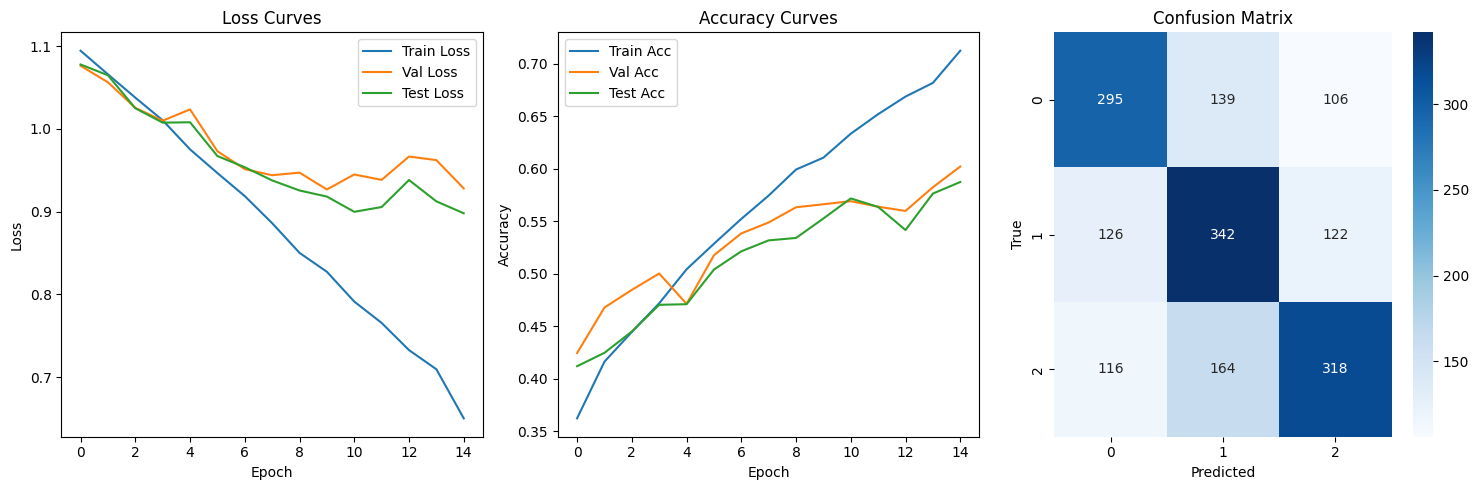

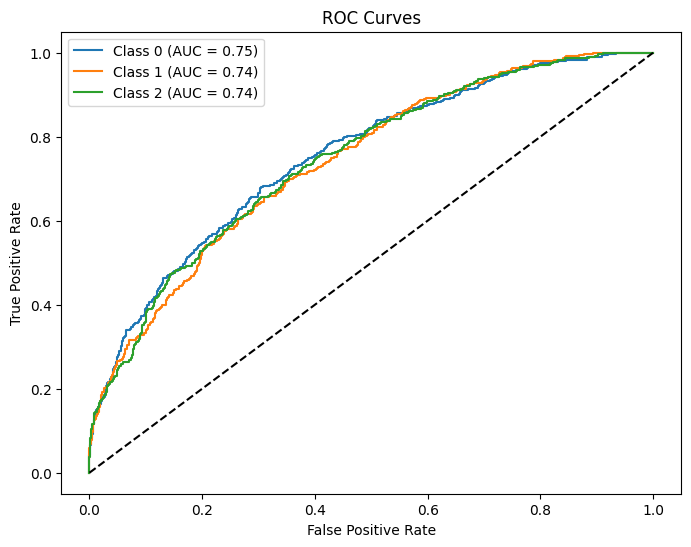


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       540
           1       0.53      0.58      0.55       590
           2       0.58      0.53      0.56       598

    accuracy                           0.55      1728
   macro avg       0.55      0.55      0.55      1728
weighted avg       0.55      0.55      0.55      1728

Multi-class AUC-ROC (One-vs-Rest): 0.7463

Training and Evaluating RNN...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0824, Train Acc: 0.3904 | Val Loss: 1.0752, Val Acc: 0.4471 | Test Loss: 1.0679, Test Acc: 0.4178
Epoch 2/50 - Train Loss: 1.0504, Train Acc: 0.4419 | Val Loss: 1.0552, Val Acc: 0.4581 | Test Loss: 1.0522, Test Acc: 0.4346
Epoch 3/50 - Train Loss: 1.0191, Train Acc: 0.4741 | Val Loss: 1.0430, Val Acc: 0.4905 | Test Loss: 1.0247, Test Acc: 0.4572
Epoch 4/50 - Train Loss: 0.9918, Train Acc: 0.4971 | Val Loss: 1.0368, Val Acc: 0.5043 | Test Loss: 1.0117, Test Acc: 0.4659
Epoch 5/50 - Train Loss: 0.9637, Train Acc: 0.5125 | Val Loss: 1.0011, Val Acc: 0.5281 | Test Loss: 0.9946, Test Acc: 0.4890
Epoch 6/50 - Train Loss: 0.9392, Train Acc: 0.5414 | Val Loss: 0.9974, Val Acc: 0.5298 | Test Loss: 0.9751, Test Acc: 0.5174
Epoch 7/50 - Train Loss: 0.9217, Train Acc: 0.5567 | Val Loss: 0.9720, Val Acc: 0.5685 | Test Loss: 0.9617, Test Acc: 0.5307
Epoch 8/50 - Train Loss: 0.8933, Train Acc: 0.5685 | Val Loss: 0.9484, Val Acc: 0.5651 | Test Loss: 0.9275, Test Acc: 0.5556


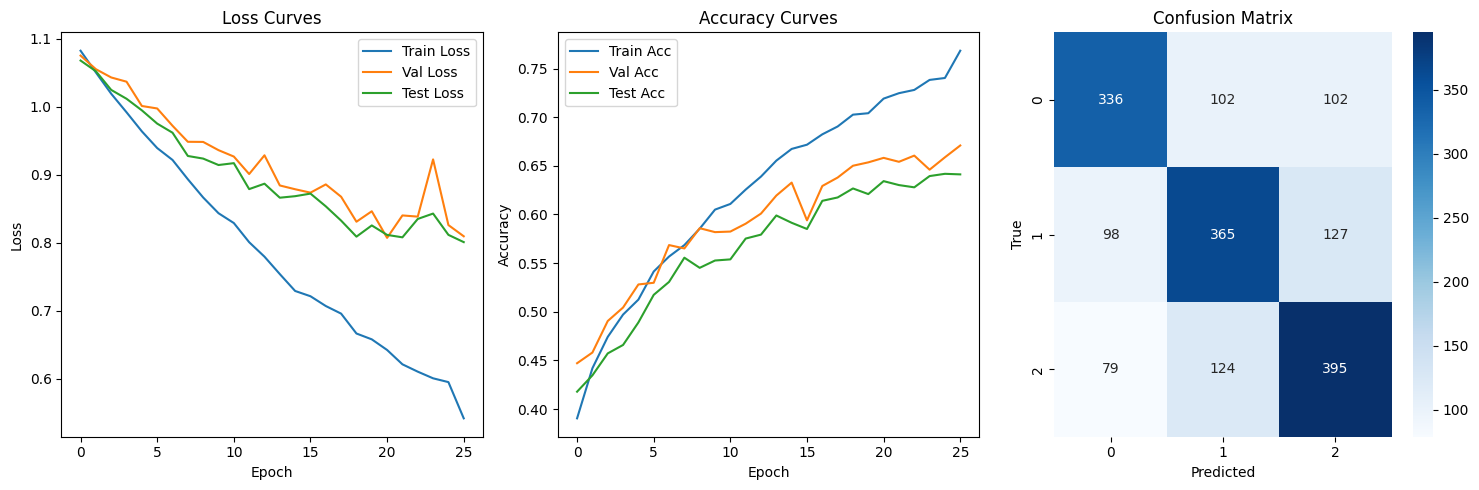

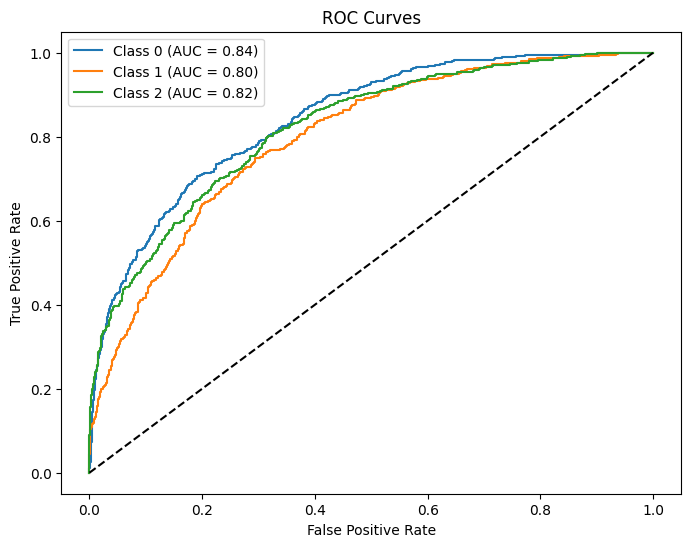


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.64       540
           1       0.62      0.62      0.62       590
           2       0.63      0.66      0.65       598

    accuracy                           0.63      1728
   macro avg       0.64      0.63      0.63      1728
weighted avg       0.63      0.63      0.63      1728

Multi-class AUC-ROC (One-vs-Rest): 0.8205

Training and Evaluating LSTM...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0884, Train Acc: 0.3803 | Val Loss: 1.0881, Val Acc: 0.4118 | Test Loss: 1.0709, Test Acc: 0.4039
Epoch 2/50 - Train Loss: 1.0371, Train Acc: 0.4526 | Val Loss: 1.0417, Val Acc: 0.4870 | Test Loss: 1.0225, Test Acc: 0.4676
Epoch 3/50 - Train Loss: 0.9811, Train Acc: 0.5003 | Val Loss: 0.9965, Val Acc: 0.5269 | Test Loss: 0.9853, Test Acc: 0.4942
Epoch 4/50 - Train Loss: 0.9264, Train Acc: 0.5438 | Val Loss: 0.9654, Val Acc: 0.5396 | Test Loss: 0.9517, Test Acc: 0.5301
Epoch 5/50 - Train Loss: 0.8741, Train Acc: 0.5824 | Val Loss: 0.9434, Val Acc: 0.5697 | Test Loss: 0.8991, Test Acc: 0.5671
Epoch 6/50 - Train Loss: 0.8188, Train Acc: 0.6140 | Val Loss: 0.9433, Val Acc: 0.5778 | Test Loss: 0.9192, Test Acc: 0.5498
Epoch 7/50 - Train Loss: 0.7751, Train Acc: 0.6387 | Val Loss: 0.9462, Val Acc: 0.5980 | Test Loss: 0.8697, Test Acc: 0.5897
Epoch 8/50 - Train Loss: 0.7368, Train Acc: 0.6672 | Val Loss: 0.9368, Val Acc: 0.6241 | Test Loss: 0.8679, Test Acc: 0.5961


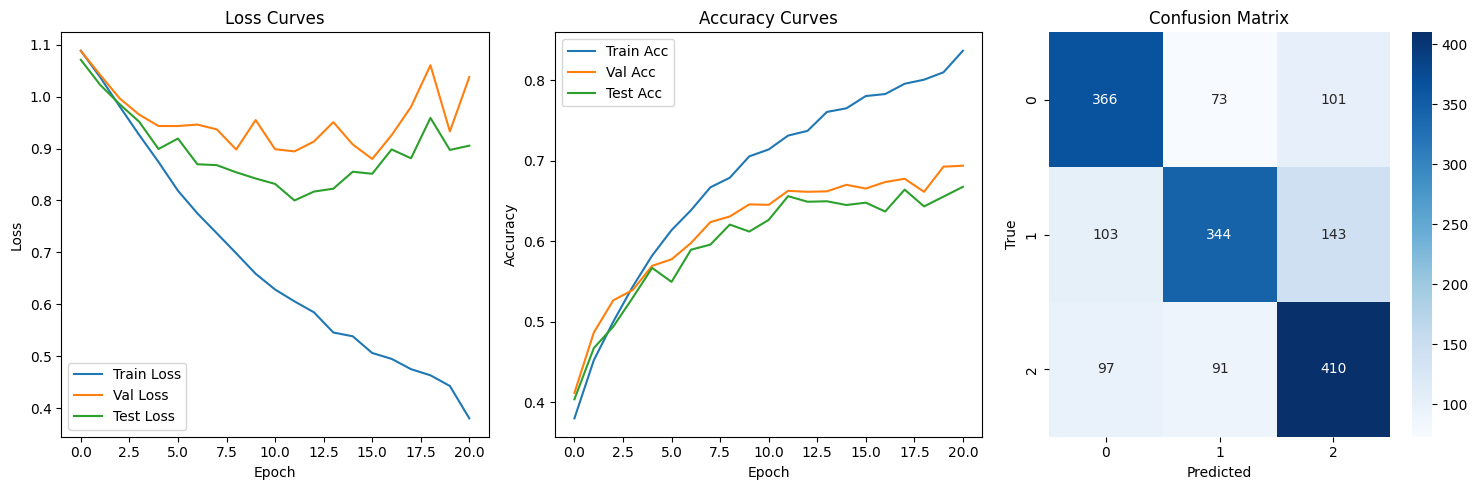

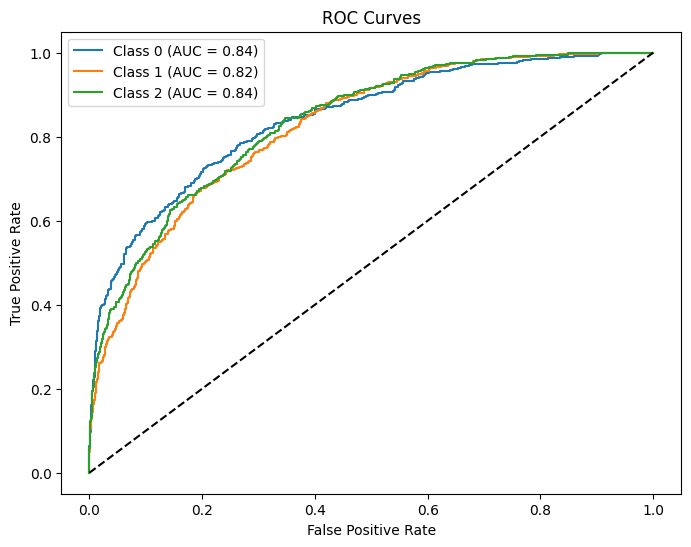


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       540
           1       0.68      0.58      0.63       590
           2       0.63      0.69      0.65       598

    accuracy                           0.65      1728
   macro avg       0.65      0.65      0.65      1728
weighted avg       0.65      0.65      0.65      1728

Multi-class AUC-ROC (One-vs-Rest): 0.8344

Training and Evaluating GRU...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0852, Train Acc: 0.3928 | Val Loss: 1.0753, Val Acc: 0.4511 | Test Loss: 1.0680, Test Acc: 0.4155
Epoch 2/50 - Train Loss: 1.0342, Train Acc: 0.4584 | Val Loss: 1.0461, Val Acc: 0.4772 | Test Loss: 1.0365, Test Acc: 0.4589
Epoch 3/50 - Train Loss: 0.9882, Train Acc: 0.4997 | Val Loss: 1.0227, Val Acc: 0.4991 | Test Loss: 0.9995, Test Acc: 0.4844
Epoch 4/50 - Train Loss: 0.9463, Train Acc: 0.5301 | Val Loss: 0.9672, Val Acc: 0.5535 | Test Loss: 0.9614, Test Acc: 0.5162
Epoch 5/50 - Train Loss: 0.9068, Train Acc: 0.5572 | Val Loss: 0.9589, Val Acc: 0.5547 | Test Loss: 0.9376, Test Acc: 0.5451
Epoch 6/50 - Train Loss: 0.8645, Train Acc: 0.5860 | Val Loss: 0.9569, Val Acc: 0.5709 | Test Loss: 0.9163, Test Acc: 0.5527
Epoch 7/50 - Train Loss: 0.8311, Train Acc: 0.6040 | Val Loss: 0.9577, Val Acc: 0.5674 | Test Loss: 0.8994, Test Acc: 0.5648
Epoch 8/50 - Train Loss: 0.8013, Train Acc: 0.6230 | Val Loss: 0.9225, Val Acc: 0.5697 | Test Loss: 0.8936, Test Acc: 0.5683


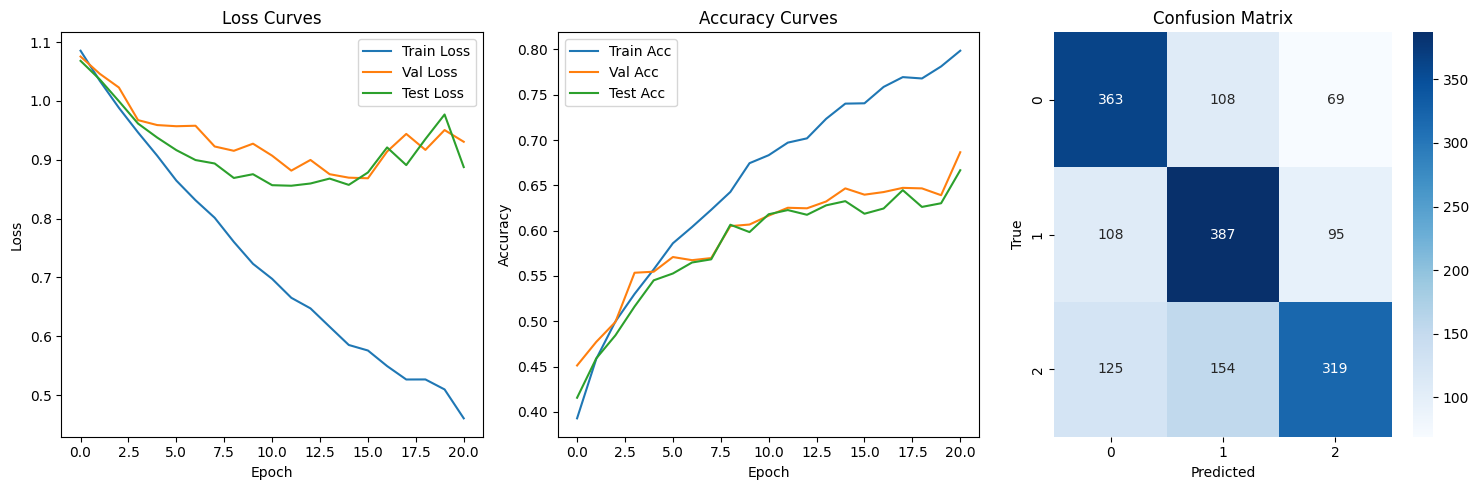

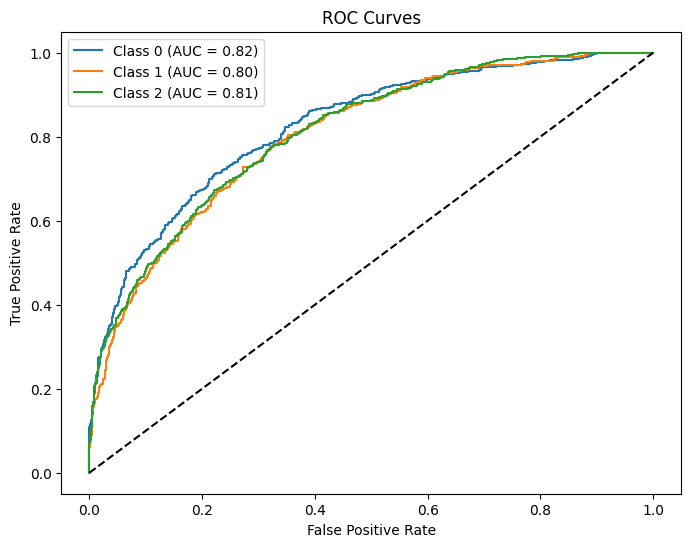


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       540
           1       0.60      0.66      0.62       590
           2       0.66      0.53      0.59       598

    accuracy                           0.62      1728
   macro avg       0.62      0.62      0.62      1728
weighted avg       0.62      0.62      0.62      1728

Multi-class AUC-ROC (One-vs-Rest): 0.8131

Training and Evaluating CNN_SE...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0955, Train Acc: 0.3571 | Val Loss: 1.0937, Val Acc: 0.3638 | Test Loss: 1.0887, Test Acc: 0.3738
Epoch 2/50 - Train Loss: 1.0756, Train Acc: 0.3961 | Val Loss: 1.0745, Val Acc: 0.4280 | Test Loss: 1.0644, Test Acc: 0.4306
Epoch 3/50 - Train Loss: 1.0499, Train Acc: 0.4278 | Val Loss: 1.0381, Val Acc: 0.4610 | Test Loss: 1.0376, Test Acc: 0.4421
Epoch 4/50 - Train Loss: 1.0260, Train Acc: 0.4500 | Val Loss: 1.0158, Val Acc: 0.4806 | Test Loss: 1.0111, Test Acc: 0.4705
Epoch 5/50 - Train Loss: 0.9932, Train Acc: 0.4895 | Val Loss: 1.0052, Val Acc: 0.4841 | Test Loss: 0.9965, Test Acc: 0.4878
Epoch 6/50 - Train Loss: 0.9641, Train Acc: 0.5153 | Val Loss: 0.9978, Val Acc: 0.4986 | Test Loss: 0.9851, Test Acc: 0.5064
Epoch 7/50 - Train Loss: 0.9374, Train Acc: 0.5416 | Val Loss: 0.9702, Val Acc: 0.5194 | Test Loss: 0.9617, Test Acc: 0.5243
Epoch 8/50 - Train Loss: 0.9035, Train Acc: 0.5633 | Val Loss: 0.9553, Val Acc: 0.5350 | Test Loss: 0.9527, Test Acc: 0.5208


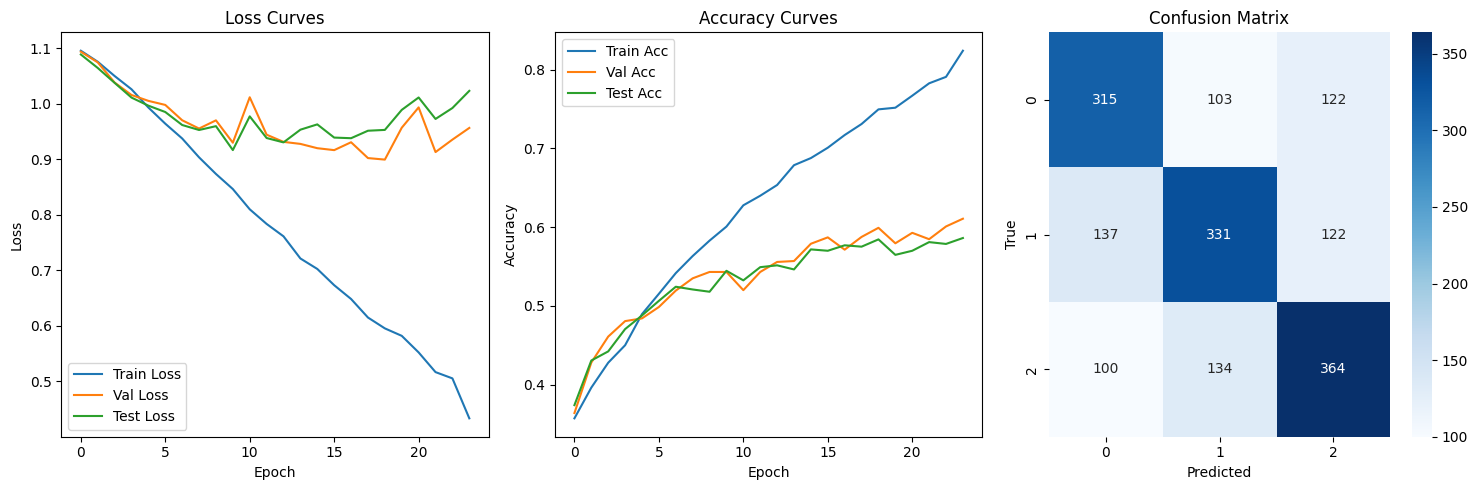

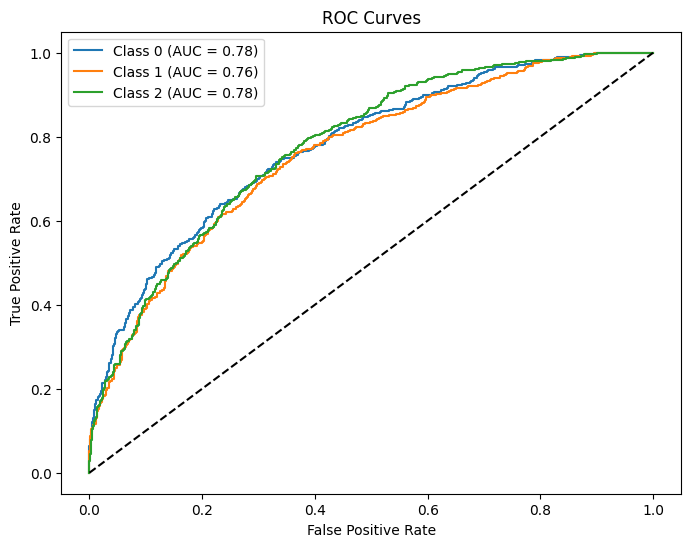


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       540
           1       0.58      0.56      0.57       590
           2       0.60      0.61      0.60       598

    accuracy                           0.58      1728
   macro avg       0.58      0.58      0.58      1728
weighted avg       0.58      0.58      0.58      1728

Multi-class AUC-ROC (One-vs-Rest): 0.7726

Training and Evaluating CNN1D_LSTM...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0965, Train Acc: 0.3510 | Val Loss: 1.0903, Val Acc: 0.4078 | Test Loss: 1.0892, Test Acc: 0.3605
Epoch 2/50 - Train Loss: 1.0803, Train Acc: 0.3946 | Val Loss: 1.0920, Val Acc: 0.3806 | Test Loss: 1.0826, Test Acc: 0.3715
Epoch 3/50 - Train Loss: 1.0672, Train Acc: 0.4126 | Val Loss: 1.0551, Val Acc: 0.4621 | Test Loss: 1.0580, Test Acc: 0.4172
Epoch 4/50 - Train Loss: 1.0409, Train Acc: 0.4471 | Val Loss: 1.0472, Val Acc: 0.4760 | Test Loss: 1.0420, Test Acc: 0.4410
Epoch 5/50 - Train Loss: 1.0154, Train Acc: 0.4624 | Val Loss: 1.0173, Val Acc: 0.4743 | Test Loss: 1.0231, Test Acc: 0.4635
Epoch 6/50 - Train Loss: 0.9901, Train Acc: 0.4873 | Val Loss: 1.0720, Val Acc: 0.4552 | Test Loss: 1.0611, Test Acc: 0.4329
Epoch 7/50 - Train Loss: 0.9659, Train Acc: 0.5080 | Val Loss: 0.9651, Val Acc: 0.5361 | Test Loss: 0.9785, Test Acc: 0.5029
Epoch 8/50 - Train Loss: 0.9323, Train Acc: 0.5295 | Val Loss: 1.0109, Val Acc: 0.4847 | Test Loss: 1.0016, Test Acc: 0.4873


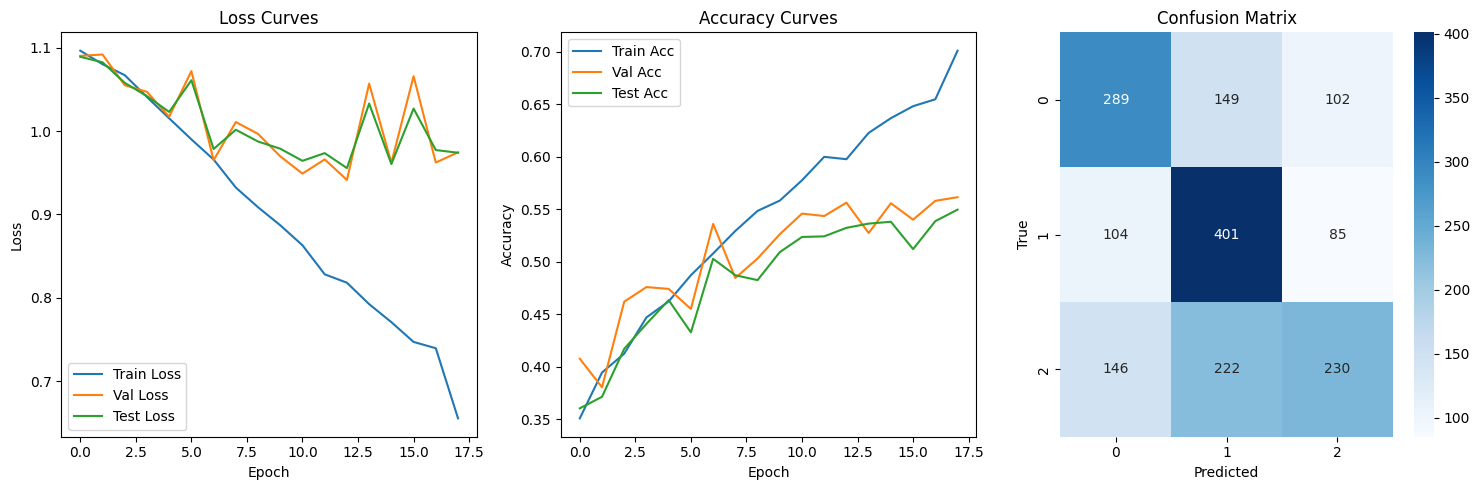

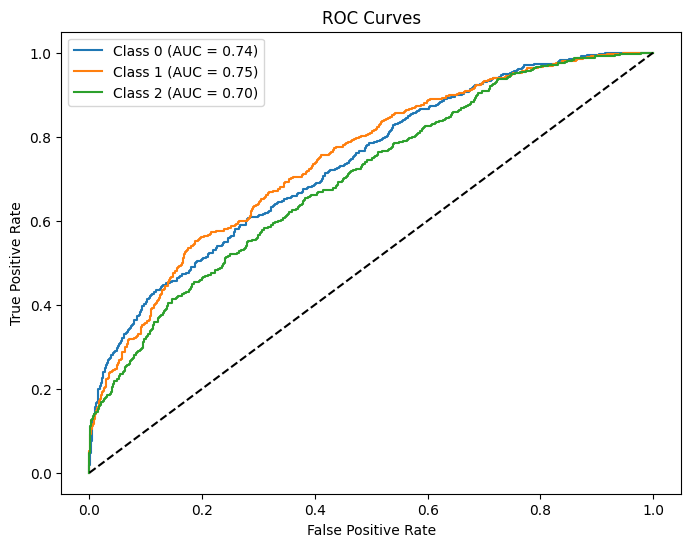


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       540
           1       0.52      0.68      0.59       590
           2       0.55      0.38      0.45       598

    accuracy                           0.53      1728
   macro avg       0.54      0.53      0.53      1728
weighted avg       0.54      0.53      0.53      1728

Multi-class AUC-ROC (One-vs-Rest): 0.7274

Training and Evaluating CNN1D_GRU...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0960, Train Acc: 0.3547 | Val Loss: 1.1004, Val Acc: 0.3644 | Test Loss: 1.0937, Test Acc: 0.3553
Epoch 2/50 - Train Loss: 1.0738, Train Acc: 0.3989 | Val Loss: 1.0901, Val Acc: 0.3887 | Test Loss: 1.0702, Test Acc: 0.3981
Epoch 3/50 - Train Loss: 1.0436, Train Acc: 0.4420 | Val Loss: 1.0491, Val Acc: 0.4523 | Test Loss: 1.0403, Test Acc: 0.4462
Epoch 4/50 - Train Loss: 1.0039, Train Acc: 0.4807 | Val Loss: 1.0280, Val Acc: 0.5032 | Test Loss: 1.0101, Test Acc: 0.4688
Epoch 5/50 - Train Loss: 0.9709, Train Acc: 0.5064 | Val Loss: 1.0111, Val Acc: 0.5119 | Test Loss: 0.9818, Test Acc: 0.5058
Epoch 6/50 - Train Loss: 0.9368, Train Acc: 0.5381 | Val Loss: 1.0140, Val Acc: 0.5194 | Test Loss: 0.9858, Test Acc: 0.5093
Epoch 7/50 - Train Loss: 0.9037, Train Acc: 0.5595 | Val Loss: 0.9973, Val Acc: 0.5240 | Test Loss: 0.9722, Test Acc: 0.5093
Epoch 8/50 - Train Loss: 0.8838, Train Acc: 0.5757 | Val Loss: 0.9814, Val Acc: 0.5408 | Test Loss: 0.9475, Test Acc: 0.5388


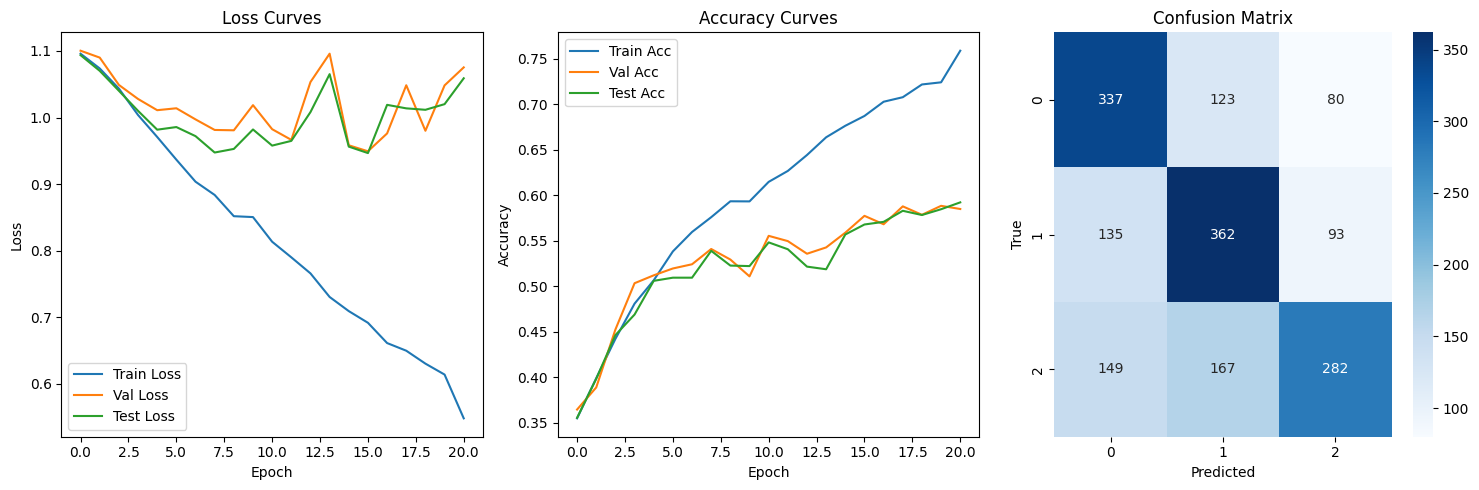

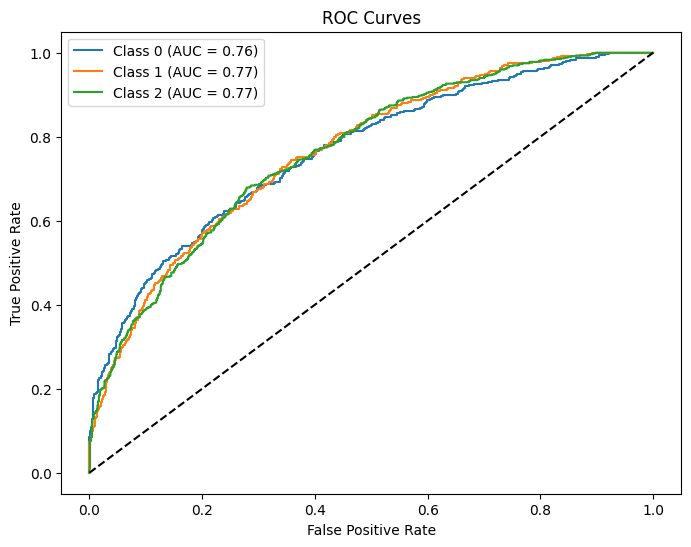


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.62      0.58       540
           1       0.56      0.61      0.58       590
           2       0.62      0.47      0.54       598

    accuracy                           0.57      1728
   macro avg       0.57      0.57      0.57      1728
weighted avg       0.57      0.57      0.57      1728

Multi-class AUC-ROC (One-vs-Rest): 0.7655

Training and Evaluating CNN1D_RNN...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0951, Train Acc: 0.3576 | Val Loss: 1.0820, Val Acc: 0.4187 | Test Loss: 1.0807, Test Acc: 0.4080
Epoch 2/50 - Train Loss: 1.0566, Train Acc: 0.4399 | Val Loss: 1.0621, Val Acc: 0.4494 | Test Loss: 1.0588, Test Acc: 0.4323
Epoch 3/50 - Train Loss: 1.0042, Train Acc: 0.4911 | Val Loss: 1.0484, Val Acc: 0.4945 | Test Loss: 1.0188, Test Acc: 0.4844
Epoch 4/50 - Train Loss: 0.9493, Train Acc: 0.5395 | Val Loss: 1.0189, Val Acc: 0.5095 | Test Loss: 1.0108, Test Acc: 0.4942
Epoch 5/50 - Train Loss: 0.9164, Train Acc: 0.5615 | Val Loss: 0.9882, Val Acc: 0.5408 | Test Loss: 0.9674, Test Acc: 0.5214
Epoch 6/50 - Train Loss: 0.8816, Train Acc: 0.5937 | Val Loss: 0.9906, Val Acc: 0.5269 | Test Loss: 0.9633, Test Acc: 0.5341
Epoch 7/50 - Train Loss: 0.8432, Train Acc: 0.6097 | Val Loss: 1.0026, Val Acc: 0.5385 | Test Loss: 0.9742, Test Acc: 0.5255
Epoch 8/50 - Train Loss: 0.8044, Train Acc: 0.6355 | Val Loss: 0.9696, Val Acc: 0.5448 | Test Loss: 0.9497, Test Acc: 0.5399


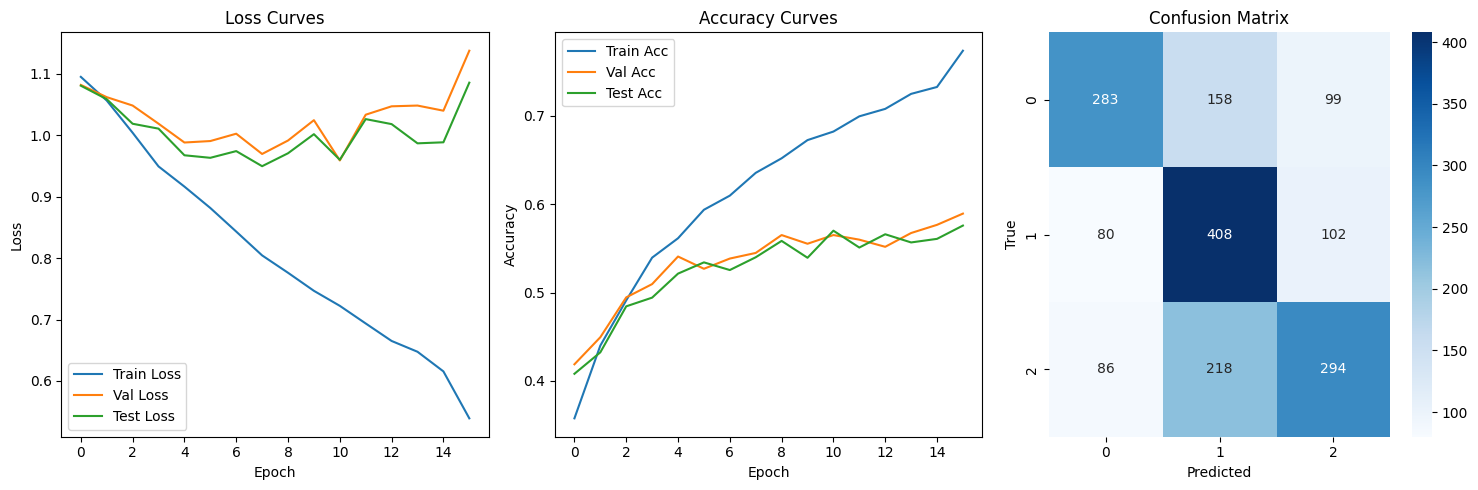

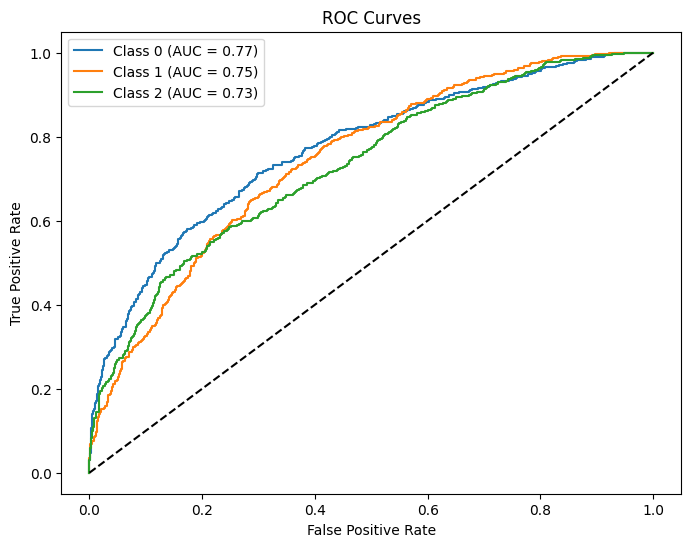


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       540
           1       0.52      0.69      0.59       590
           2       0.59      0.49      0.54       598

    accuracy                           0.57      1728
   macro avg       0.58      0.57      0.57      1728
weighted avg       0.58      0.57      0.57      1728

Multi-class AUC-ROC (One-vs-Rest): 0.7495

Training and Evaluating CNN_RNN_Attention...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0971, Train Acc: 0.3528 | Val Loss: 1.0979, Val Acc: 0.3516 | Test Loss: 1.0948, Test Acc: 0.3634
Epoch 2/50 - Train Loss: 1.0762, Train Acc: 0.4082 | Val Loss: 1.0933, Val Acc: 0.3904 | Test Loss: 1.0822, Test Acc: 0.3872
Epoch 3/50 - Train Loss: 1.0592, Train Acc: 0.4254 | Val Loss: 1.0563, Val Acc: 0.4517 | Test Loss: 1.0524, Test Acc: 0.4421
Epoch 4/50 - Train Loss: 1.0391, Train Acc: 0.4443 | Val Loss: 1.0753, Val Acc: 0.4286 | Test Loss: 1.0490, Test Acc: 0.4410
Epoch 5/50 - Train Loss: 1.0198, Train Acc: 0.4636 | Val Loss: 1.0466, Val Acc: 0.4442 | Test Loss: 1.0442, Test Acc: 0.4514
Epoch 6/50 - Train Loss: 1.0044, Train Acc: 0.4750 | Val Loss: 1.0619, Val Acc: 0.4673 | Test Loss: 1.0221, Test Acc: 0.4659
Epoch 7/50 - Train Loss: 0.9892, Train Acc: 0.4872 | Val Loss: 1.0363, Val Acc: 0.4876 | Test Loss: 1.0020, Test Acc: 0.4815
Epoch 8/50 - Train Loss: 0.9716, Train Acc: 0.4965 | Val Loss: 1.0281, Val Acc: 0.4650 | Test Loss: 1.0171, Test Acc: 0.4763


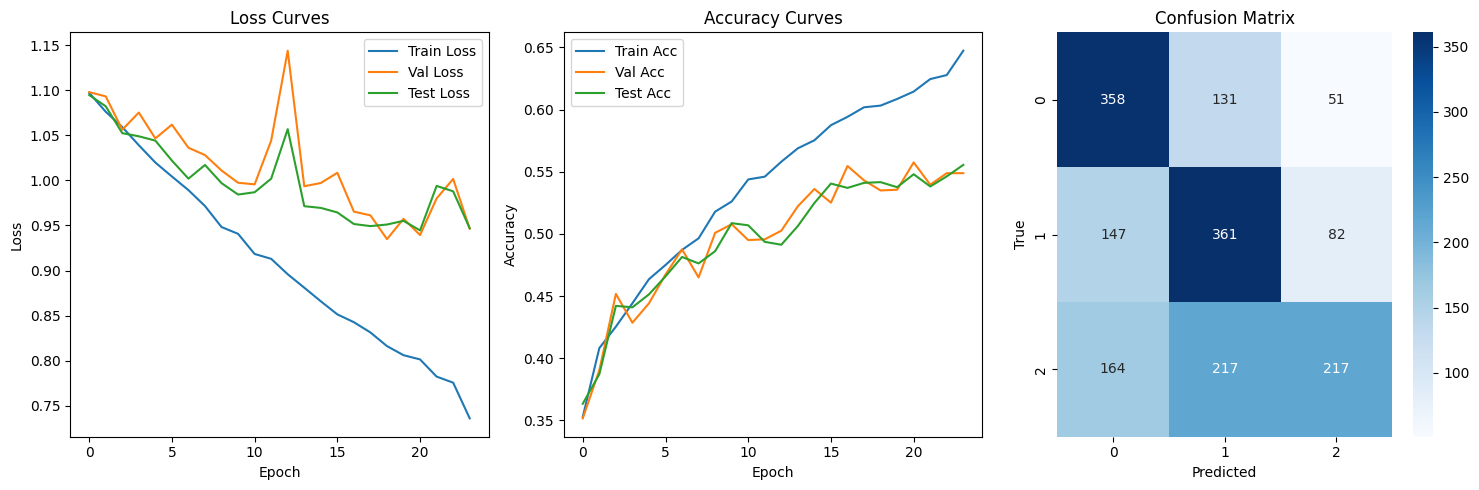

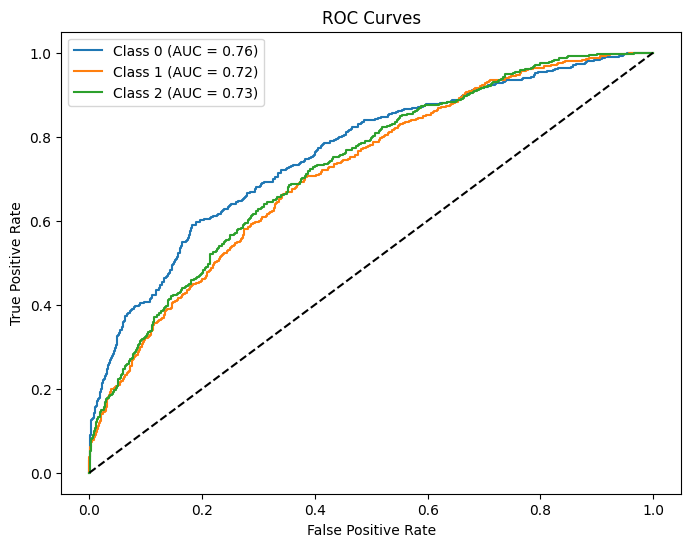


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.66      0.59       540
           1       0.51      0.61      0.56       590
           2       0.62      0.36      0.46       598

    accuracy                           0.54      1728
   macro avg       0.55      0.55      0.54      1728
weighted avg       0.56      0.54      0.53      1728

Multi-class AUC-ROC (One-vs-Rest): 0.7348

Training and Evaluating CNN_LSTM_Attention...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0981, Train Acc: 0.3396 | Val Loss: 1.1002, Val Acc: 0.3476 | Test Loss: 1.0952, Test Acc: 0.3698
Epoch 2/50 - Train Loss: 1.0905, Train Acc: 0.3789 | Val Loss: 1.0860, Val Acc: 0.4158 | Test Loss: 1.0805, Test Acc: 0.3924
Epoch 3/50 - Train Loss: 1.0703, Train Acc: 0.4108 | Val Loss: 1.0693, Val Acc: 0.4494 | Test Loss: 1.0574, Test Acc: 0.4086
Epoch 4/50 - Train Loss: 1.0480, Train Acc: 0.4320 | Val Loss: 1.0672, Val Acc: 0.4534 | Test Loss: 1.0461, Test Acc: 0.4329
Epoch 5/50 - Train Loss: 1.0358, Train Acc: 0.4464 | Val Loss: 1.0484, Val Acc: 0.4517 | Test Loss: 1.0332, Test Acc: 0.4473
Epoch 6/50 - Train Loss: 1.0176, Train Acc: 0.4655 | Val Loss: 1.0612, Val Acc: 0.4766 | Test Loss: 1.0329, Test Acc: 0.4664
Epoch 7/50 - Train Loss: 1.0044, Train Acc: 0.4727 | Val Loss: 1.0421, Val Acc: 0.4864 | Test Loss: 1.0166, Test Acc: 0.4774
Epoch 8/50 - Train Loss: 0.9898, Train Acc: 0.4905 | Val Loss: 1.0307, Val Acc: 0.4899 | Test Loss: 1.0029, Test Acc: 0.4954


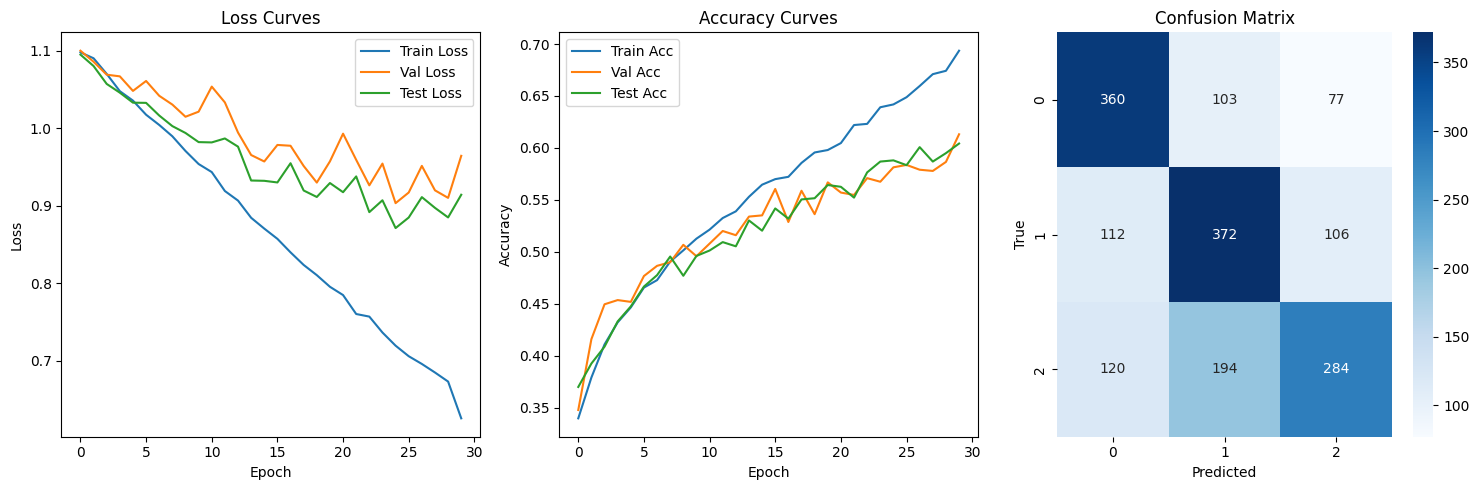

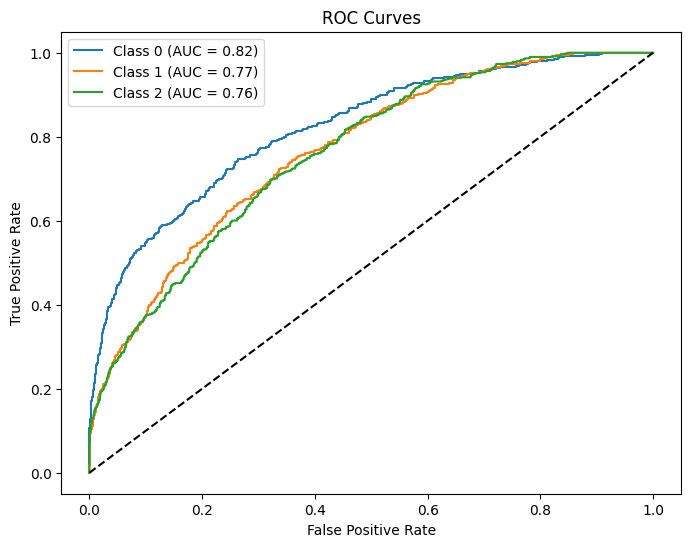


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       540
           1       0.56      0.63      0.59       590
           2       0.61      0.47      0.53       598

    accuracy                           0.59      1728
   macro avg       0.59      0.59      0.59      1728
weighted avg       0.59      0.59      0.59      1728

Multi-class AUC-ROC (One-vs-Rest): 0.7831

Training and Evaluating CNN_GRU_Attention...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0959, Train Acc: 0.3558 | Val Loss: 1.0886, Val Acc: 0.3829 | Test Loss: 1.0838, Test Acc: 0.3814
Epoch 2/50 - Train Loss: 1.0756, Train Acc: 0.3976 | Val Loss: 1.0900, Val Acc: 0.4037 | Test Loss: 1.0774, Test Acc: 0.3877
Epoch 3/50 - Train Loss: 1.0616, Train Acc: 0.4217 | Val Loss: 1.0753, Val Acc: 0.4332 | Test Loss: 1.0610, Test Acc: 0.4051
Epoch 4/50 - Train Loss: 1.0463, Train Acc: 0.4346 | Val Loss: 1.0771, Val Acc: 0.4477 | Test Loss: 1.0495, Test Acc: 0.4300
Epoch 5/50 - Train Loss: 1.0309, Train Acc: 0.4514 | Val Loss: 1.0639, Val Acc: 0.4725 | Test Loss: 1.0370, Test Acc: 0.4462
Epoch 6/50 - Train Loss: 1.0179, Train Acc: 0.4558 | Val Loss: 1.0332, Val Acc: 0.4806 | Test Loss: 1.0196, Test Acc: 0.4711
Epoch 7/50 - Train Loss: 0.9992, Train Acc: 0.4741 | Val Loss: 1.0509, Val Acc: 0.4627 | Test Loss: 1.0278, Test Acc: 0.4456
Epoch 8/50 - Train Loss: 0.9938, Train Acc: 0.4735 | Val Loss: 1.0173, Val Acc: 0.4887 | Test Loss: 1.0110, Test Acc: 0.4716


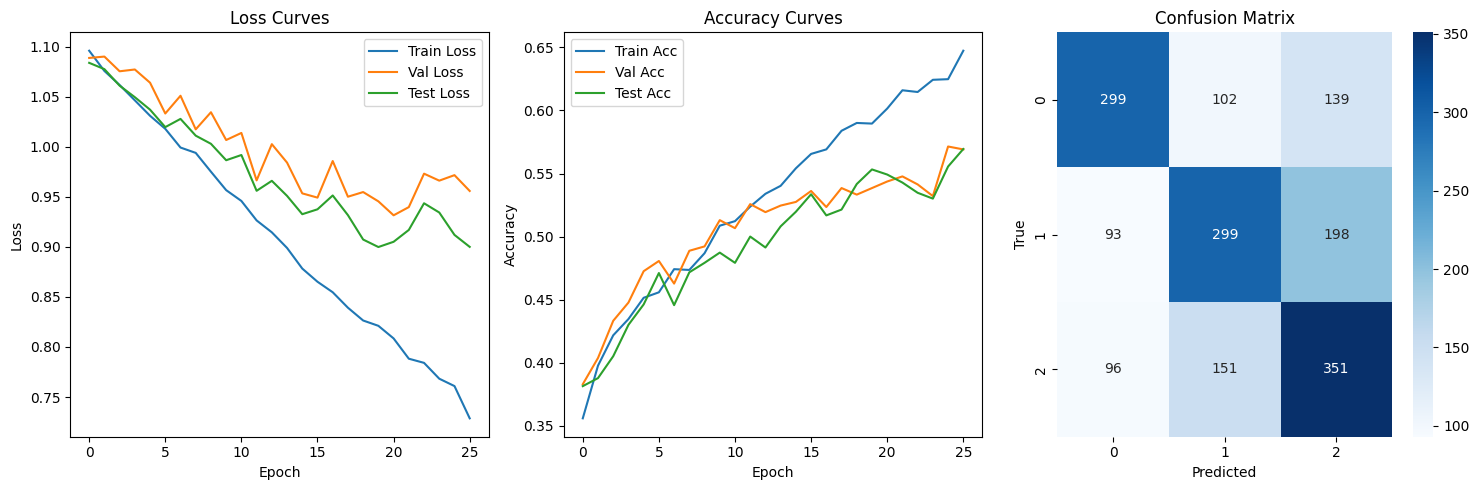

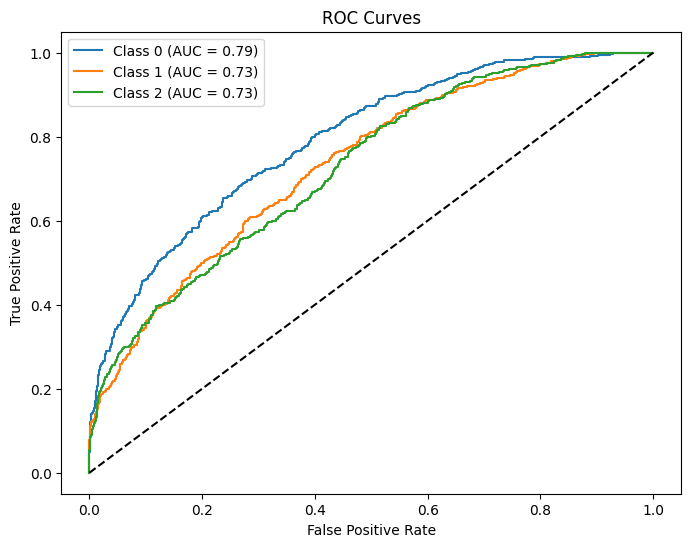


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       540
           1       0.54      0.51      0.52       590
           2       0.51      0.59      0.55       598

    accuracy                           0.55      1728
   macro avg       0.55      0.55      0.55      1728
weighted avg       0.55      0.55      0.55      1728

Multi-class AUC-ROC (One-vs-Rest): 0.7511

Training and Evaluating ResNet1D...


c:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 - Train Loss: 1.0824, Train Acc: 0.3935 | Val Loss: 1.0814, Val Acc: 0.4430 | Test Loss: 1.0561, Test Acc: 0.4311
Epoch 2/50 - Train Loss: 1.0323, Train Acc: 0.4558 | Val Loss: 1.0292, Val Acc: 0.4916 | Test Loss: 1.0125, Test Acc: 0.4751
Epoch 3/50 - Train Loss: 0.9971, Train Acc: 0.4910 | Val Loss: 1.0335, Val Acc: 0.5043 | Test Loss: 1.0029, Test Acc: 0.5081
Epoch 4/50 - Train Loss: 0.9459, Train Acc: 0.5295 | Val Loss: 0.9734, Val Acc: 0.5304 | Test Loss: 0.9526, Test Acc: 0.5295
Epoch 5/50 - Train Loss: 0.9030, Train Acc: 0.5643 | Val Loss: 0.9388, Val Acc: 0.5564 | Test Loss: 0.9234, Test Acc: 0.5613
Epoch 6/50 - Train Loss: 0.8551, Train Acc: 0.5978 | Val Loss: 0.9406, Val Acc: 0.5495 | Test Loss: 0.9326, Test Acc: 0.5469
Epoch 7/50 - Train Loss: 0.8016, Train Acc: 0.6269 | Val Loss: 0.9373, Val Acc: 0.5755 | Test Loss: 0.9185, Test Acc: 0.5544
Epoch 8/50 - Train Loss: 0.7605, Train Acc: 0.6571 | Val Loss: 0.9536, Val Acc: 0.5807 | Test Loss: 0.8871, Test Acc: 0.5880


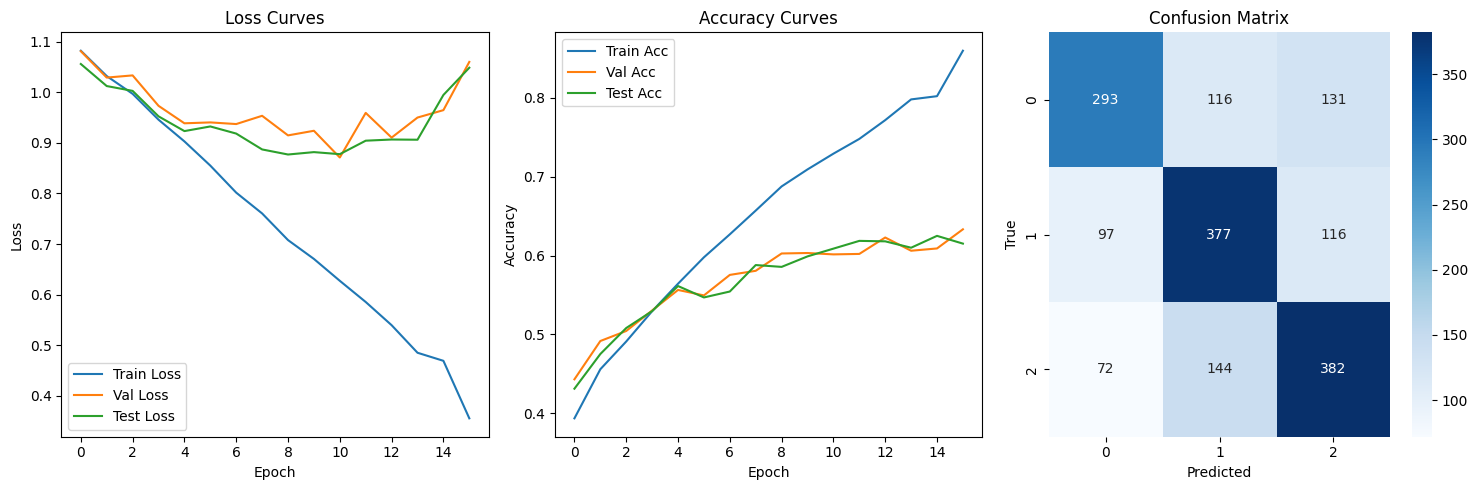

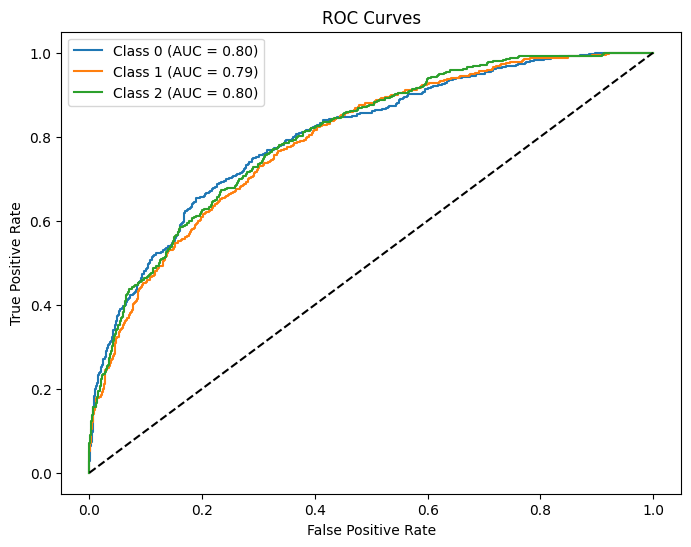


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       540
           1       0.59      0.64      0.61       590
           2       0.61      0.64      0.62       598

    accuracy                           0.61      1728
   macro avg       0.61      0.61      0.61      1728
weighted avg       0.61      0.61      0.61      1728

Multi-class AUC-ROC (One-vs-Rest): 0.7991


In [45]:

# Results Storage
results = {}
results_df_data = []

for name, model in models.items():
    print(f"\nTraining and Evaluating {name}...")
    trained_model, metrics = train_and_evaluate(model, train_loader, val_loader, test_loader)
    results[name] = metrics
    
    # Append metrics to DataFrame data
    results_df_data.append({
        'Model': name,
        'Train Loss': metrics['train_loss'],
        'Val Loss': metrics['val_loss'],
        'Test Loss': metrics['test_loss'],
        'Train Acc': metrics['train_acc'],
        'Val Acc': metrics['val_acc'],
        'Test Acc': metrics['test_acc'],
        'AUC-ROC': metrics['auc_roc'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1_score']
    })



In [47]:
# Create DataFrame
results_df = pd.DataFrame(results_df_data)
print("\nResults Summary:")
print(results_df)

# Save to CSV
results_df.to_csv("model_results.csv", index=False)


Results Summary:
                 Model  Train Loss  Val Loss  Test Loss  Train Acc   Val Acc  \
0                  CNN    0.650102  0.926766   0.898008   0.712390  0.602082   
1                  RNN    0.541453  0.807031   0.800757   0.768324  0.670908   
2                 LSTM    0.380196  0.879855   0.799948   0.836909  0.694043   
3                  GRU    0.460505  0.868443   0.855759   0.798586  0.686524   
4               CNN_SE    0.433453  0.899390   0.916538   0.824259  0.610758   
5           CNN1D_LSTM    0.655234  0.941396   0.955627   0.701104  0.561596   
6            CNN1D_GRU    0.548414  0.949417   0.946713   0.758651  0.588201   
7            CNN1D_RNN    0.539039  0.959010   0.949659   0.773781  0.589358   
8    CNN_RNN_Attention    0.736020  0.934838   0.944543   0.647402  0.557548   
9   CNN_LSTM_Attention    0.625765  0.903500   0.871341   0.693538  0.613071   
10   CNN_GRU_Attention    0.728701  0.931482   0.899800   0.647402  0.571429   
11            ResNet1D

In [49]:
results_df

,Model,Train Loss,Val Loss,Test Loss,Train Acc,Val Acc,Test Acc,AUC-ROC,Precision,Recall,F1-Score
0,CNN,0.650102,0.926766,0.898008,0.712390,0.602082,0.587384,0.746276,0.553999,0.552577,0.552536
1,RNN,0.541453,0.807031,0.800757,0.768324,0.670908,0.641782,0.820532,0.635194,0.633800,0.634259
2,LSTM,0.380196,0.879855,0.799948,0.836909,0.694043,0.667824,0.834382,0.650240,0.648816,0.647797
3,GRU,0.460505,0.868443,0.855759,0.798586,0.686524,0.666667,0.813086,0.621939,0.620533,0.617992
4,CNN_SE,0.433453,0.899390,0.916538,0.824259,0.610758,0.586227,0.772618,0.584028,0.584349,0.584082
5,CNN1D_LSTM,0.655234,0.941396,0.955627,0.701104,0.561596,0.549769,0.727409,0.535722,0.533154,0.525908
6,CNN1D_GRU,0.548414,0.949417,0.946713,0.758651,0.588201,0.592014,0.765460,0.572556,0.569735,0.566359
7,CNN1D_RNN,0.539039,0.959010,0.949659,0.773781,0.589358,0.575810,0.749480,0.581546,0.569079,0.568050
8,CNN_RNN_Attention,0.736020,0.934838,0.944543,0.647402,0.557548,0.555556,0.734848,0.554765,0.545901,0.535281
9,CNN_LSTM_Attention,0.625765,0.903500,0.871341,0.693538,0.613071,0.604167,0.783137,0.590766,0.590697,0.586774


results_df